# Temporal Difference Learning (TD Learning)

## Windy gridworld

Based on [this](https://github.com/kkm24132/ReinforcementLearning/blob/main/04_TemporalDiff/WindyGridWorld.ipynb) notebook.

In [ ]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt 
import seaborn as sns
import time

%matplotlib inline
sns.set_style("whitegrid")

### Defining an environment

In [ ]:
class GridWorld(object):
    
    def __init__(self):
        super(GridWorld, self).__init__()
        self.start = 0
        self.goal = 0
        
        # Provide the setting of gridWorld rows and columns
        self.row = 7
        self.col = 10
        self.x_max = self.col - 1
        self.y_max = self.row - 1

        # Declare windy columns and their effect
        self.wind_1 = [3, 4, 5, 8]
        self.wind_2 = [6, 7]
        
        # Provide action list : Up/Down/Left/Right
        self.actions_list = ['N', 'E', 'S', 'W']
      
    # here, cells defined by index
    def cell(self,pos):
        return pos[1] + self.col * pos[0]
    
    def setTerminal(self, startState, goalState):
        # startState and goalState are tuples
        self.start = self.cell(startState)
        self.goal = self.cell(goalState)
        
    def nextState(self, state, action):
        # The "state" parameter is an integer that represents position in grid
        x = state % self.col
        y = (state - x) / self.col

        # Now let's define and interpret actions
        del_x = 0
        del_y = 0
        if action == 'E':
            del_x = 1
        elif action == 'W':
            del_x = -1
        elif action == 'N':
            del_y = -1
        elif action == 'S':
            del_y = 1
        else:
            raise('Invalid action! Actions taken must be in: ', self.actions_list)

        # Now move to new position
        new_x = max(0, min(x + del_x, self.x_max))
        new_y = max(0, min(y + del_y, self.y_max))
        
        # When wind blows to a new state
        if new_x in self.wind_1:
            new_y = max(0, new_y - 1)
        if new_x in self.wind_2:
            new_y = max(0, new_y - 2)
        
        # now let's return these new state values
        return self.cell((new_y,new_x))
    
    def checkTerminal(self, state):
        return state == self.goal
    
    def rewardFunction(self, state_prime):
        # When it reaches terminal state then reward is 0 else all actions should yield -1
        if self.checkTerminal(state_prime):
            return 0
        else:
            return -1

In [ ]:
def trajectoryPath(world, traj):
    # Initialize gridworld
    world_map = np.zeros((world.row, world.col))
    for i,state in enumerate(traj):
        x = int(state % world.col)
        y = int((state - x) / world.col)
        world_map[y, x] = i + 1
    print(world_map)
    print("\n")

### SARSA

In [ ]:
# function for greedy action
def greedyAct(_q_dict):
    greedy_act = ''
    max_q = -1e10
    for act in world.actions_list:
        if _q_dict[act] > max_q:
            greedy_act = act
            max_q = _q_dict[act]
    return greedy_act

# function for epsilon-greedy action
def epsGreedy(episode, q_dict, epsilon):
    
    m = len(world.actions_list)
    greedy_act = greedyAct(q_dict)

    # strange implementation; today you will see better ones
    p = []
    for act in world.actions_list:
        if act == greedy_act:
            p.append((epsilon * 1. / m) + 1 - epsilon)
        else:
            p.append(epsilon * 1. / m)

    # choose one action given proba
    choice = np.random.choice(world.actions_list, size = 1, p = p)
    return choice[0]

In [ ]:
def gridWorld_SARSA(world, startState, goalState, alpha=0.1, gamma=1, epsilon=0.1):
    # Consider input parameters:
    # gamma = 1 as discounted factor
    # default values of alpha and epsilon considered, it will be changed for multiple analysis
    world.setTerminal(startState, goalState)
    
    # Initialize Q(s,a)
    q_table = {}
    for state in range(world.row * world.col):
        q_table[state] = {}
        for act in world.actions_list:
            q_table[state][act] = 0
    
    ep = 1 # Episode number
    ep_max = 300 # number of max episodes
    step_ep_list = []
    step = 0

    # strange implementation
    while ep < ep_max:

        # Initialize state
        state = world.cell(startState)
        trajectory = [state]
        
        # Choose action from state
        act = epsGreedy(ep, q_table[state], epsilon)

        # Processing action
        while not world.checkTerminal(state):
            state_prime = world.nextState(state, act)
            reward = world.rewardFunction(state_prime)
            act_prime = epsGreedy(ep, q_table[state_prime], epsilon)
            # what's wrong with it?
            q_table[state][act] += alpha * (reward + gamma * q_table[state_prime][act_prime] - q_table[state][act])
            state = state_prime
            act = act_prime

            # Increase Step Counter
            step += 1
            
            # Store the index of the episode of this time step
            step_ep_list.append(ep)
            
            # Update the trajectory
            trajectory.append(state)
        
        if ep == (ep_max - 1):
            trajectoryPath(world, trajectory)
        # Increase the episode counter
        ep += 1
    
    start_time = time.time()
    plt.plot(step_ep_list)
    print("Time elapsed is (in Secs): ", time.time() - start_time)
    plt.title('WindyGridWorld_SARSA ', fontsize = 'large')
    plt.xlabel("Number of Steps taken")
    plt.ylabel("Number of Episodes")
    plt.show()

#### SARSA experiments

Plot for Option: ∈=0.1, α=0.5 

[[ 0.  0.  0.  0.  0.  6.  7.  8.  9. 10.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0. 11.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  0. 12.]
 [ 1.  2.  3.  0.  0.  0.  0. 18.  0. 13.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 14.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 17. 15.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 16.]]


Time elapsed is (in Secs):  0.04052281379699707


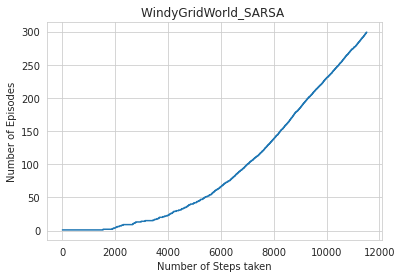

In [ ]:
startState = (3, 0)
goalState = (3, 7)
world = GridWorld()
print("Plot for Option: ∈=0.1, α=0.5 \n")
gridWorld_SARSA(world, startState, goalState, alpha=0.5, epsilon=0.1)

Plot for Option: ∈=0.2, α=0.1 

[[ 0.  0.  0.  0.  0. 20. 21. 28. 29. 30.]
 [ 5.  0.  0.  0. 19.  0.  0.  0.  0. 31.]
 [12. 13. 16. 18.  0.  0.  0.  0.  0. 32.]
 [ 9. 14. 17.  0.  0.  0.  0. 38.  0. 33.]
 [ 8.  0.  0.  0.  0.  0.  0.  0.  0. 34.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 37. 35.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.]]


Time elapsed is (in Secs):  0.05563664436340332


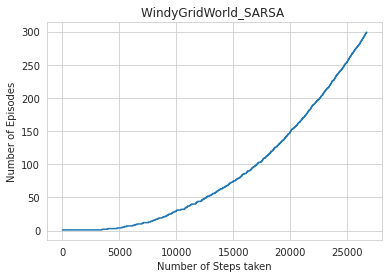

In [ ]:
world = GridWorld()
print("Plot for Option: ∈=0.2, α=0.1 \n")
gridWorld_SARSA(world, startState, goalState, alpha=0.1, epsilon=0.2)

Plot for Option: ∈=0.05, α=0.2 

[[ 0.  0.  0.  0.  0.  7.  8.  9. 10. 11.]
 [ 0.  0.  0.  0.  6.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  5.  0.  0.  0.  0.  0. 13.]
 [ 2.  3.  4.  0.  0.  0.  0. 22.  0. 14.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 15.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 21. 19.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]]


Time elapsed is (in Secs):  0.05971026420593262


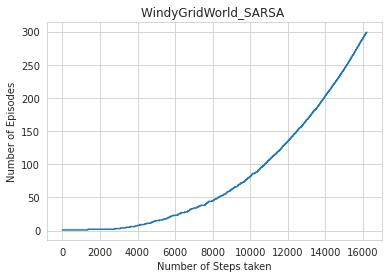

In [ ]:
world = GridWorld()
print("Plot for Option: ∈=0.05, α=0.2 \n")
gridWorld_SARSA(world, startState, goalState, alpha=0.2, epsilon=0.05)

### Q-Learning

In [ ]:
def gridWorld_QLearning(world, startState, goalState, alpha, gamma=1, ep_max=300, eps=0.1):
    world.setTerminal(startState, goalState) 
    # Initialize Q(s, a)
    q_dict = {}
    for state in range(world.row * world.col):
        q_dict[state] = {}
        for act in world.actions_list:
            if world.checkTerminal(state):
                q_dict[state][act] = 0
            else:
                q_dict[state][act] = np.random.rand()

    ep_wrt_step = []
    trajectory = []
    for ep in range(1, ep_max + 1):
        s = world.start
        trajectory = []
        while not world.checkTerminal(s):
            # Choose act according to behaviour policy
            act = epsGreedy(ep, q_dict[s], eps)
            # take act, observe s_prime & reward
            s_prime = world.nextState(s, act)
            reward = world.rewardFunction(s_prime)

            # choose act_prime according to target policy
            act_prime = greedyAct(q_dict[s_prime])
            # Update Q(s, a)
            q_dict[s][act] += alpha * (reward + gamma * q_dict[s_prime][act_prime] - q_dict[s][act])

            # store trajectory
            trajectory.append(s)

            # update current state
            s = s_prime
            # store the index of this episode for plot
            ep_wrt_step.append(ep)
        trajectory.append(world.goal)
    return trajectory, ep_wrt_step

#### Q-Learning experiments

Time elapsed:  1.2183196544647217
[[ 0.  0.  0.  0.  0.  6.  7.  8.  9. 10.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0. 12.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  0. 13.]
 [ 1.  2.  3.  0.  0.  0.  0. 21.  0. 16.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 17.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 20. 18.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 19.]]




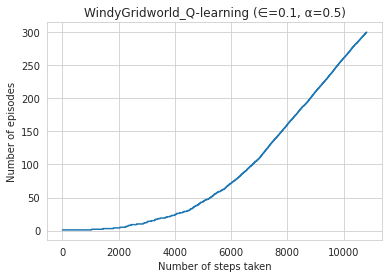

In [ ]:
world = GridWorld()
start_time = time.time()
trajectory, ep_wrt_step = gridWorld_QLearning(world, startState, goalState, alpha=0.5,gamma=0.9,ep_max=300, eps=0.1)
print("Time elapsed: ", time.time() - start_time)
trajectoryPath(world, trajectory)
pl.figure(1)
pl.plot(ep_wrt_step)
plt.title('WindyGridworld_Q-learning (∈=0.1, α=0.5)', fontsize = 'large')
pl.xlabel("Number of steps taken")
pl.ylabel("Number of episodes")
pl.show()

Time elapsed:  3.0974791049957275
[[10. 11. 12. 17. 18. 19. 20. 23. 24. 28.]
 [ 9.  4. 16. 15.  0.  0.  0.  0.  0. 29.]
 [ 2.  0. 14.  0.  0.  0.  0.  0.  0. 30.]
 [ 1.  0.  0.  0.  0.  0.  0. 36.  0. 31.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 32.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 35. 33.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 34.]]




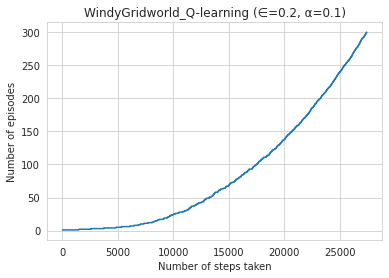

In [ ]:
world = GridWorld()
start_time = time.time()
trajectory, ep_wrt_step = gridWorld_QLearning(world, startState, goalState, alpha=0.1,gamma=0.9,ep_max=300, eps=0.2)
print("Time elapsed: ", time.time() - start_time)
trajectoryPath(world, trajectory)
pl.figure(1)
pl.plot(ep_wrt_step)
plt.title('WindyGridworld_Q-learning (∈=0.2, α=0.1)', fontsize = 'large')
pl.xlabel("Number of steps taken")
pl.ylabel("Number of episodes")
pl.show()

Time elapsed:  1.9719188213348389
[[ 0.  0.  0.  0.  0.  6.  7.  8.  9. 10.]
 [ 0.  0.  0.  0.  5.  0.  0.  0. 16. 17.]
 [ 0.  0.  0.  4.  0.  0.  0.  0.  0. 18.]
 [ 1.  2.  3.  0.  0.  0.  0. 26.  0. 19.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 20.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 25. 21.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 24.]]




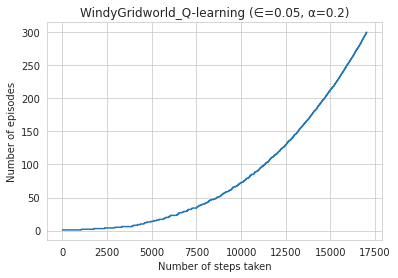

In [ ]:
world = GridWorld()
start_time = time.time()
trajectory, ep_wrt_step = gridWorld_QLearning(world, startState, goalState, alpha=0.2,gamma=0.9,ep_max=300, eps=0.05)
print("Time elapsed: ", time.time() - start_time)
trajectoryPath(world, trajectory)
pl.figure(1)
pl.plot(ep_wrt_step)
plt.title('WindyGridworld_Q-learning (∈=0.05, α=0.2)', fontsize = 'large')
pl.xlabel("Number of steps taken")
pl.ylabel("Number of episodes")
pl.show()

## Gym Taxi

Based on [tutorial](https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/).

### Environments in gym

In [ ]:
!pip install cmake 'gym[atari]' 'gym[toy_text]' scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
     |████████████████████████████████| 18.3 MB 78 kB/s 


/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym

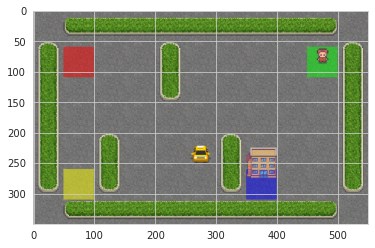

In [ ]:
import gym

# making an environment
env = gym.make("Taxi-v3").env

env.reset()
prev_screen = env.render(mode='rgb_array')

plt.imshow(prev_screen)
plt.show()

In [ ]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


State: 328


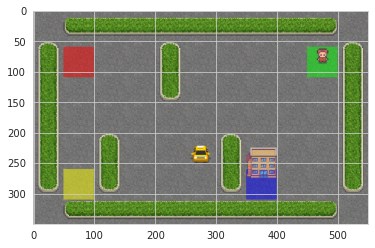

In [ ]:
# setting taxi at (3, 1), pass. loc 2, destination loc. 0
state = env.encode(3, 1, 2, 0)
print("State:", state)

env.s = state
prev_screen = env.render(mode='rgb_array')

plt.imshow(prev_screen)
plt.show()

In [ ]:
# reward table 

env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

`{action: [(probability, nextstate, reward, done)]}`

This environment is deterministic and fully observable. So, one may use MDP. Let us use Q-learning instead. 

### Q-learning

In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [ ]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1
        
        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 1min 35s, sys: 8.52 s, total: 1min 43s
Wall time: 1min 49s


In [ ]:
q_table[328]

array([ -2.40488326,  -2.27325184,  -2.41348084,  -2.36248756,
       -10.52812709, -10.59737416])

Now let us evaluate and agent:

In [ ]:
total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.24
Average penalties per episode: 0.0


## Mountain Car

In [ ]:
import numpy as np # used for arrays
import gym # pull the environment
import time # to get the times

In [ ]:
env = gym.make('MountainCar-v0')
env.reset()

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


array([-0.4425147,  0.       ], dtype=float32)

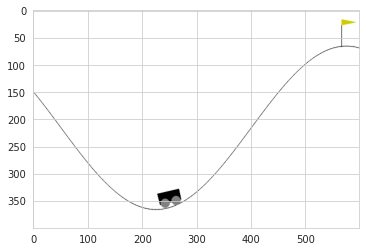

In [ ]:
prev_screen = env.render(mode='rgb_array')

plt.imshow(prev_screen)
plt.show()

In [ ]:
import imageio

In [137]:
def QLearning(env, learning, discount, epsilon, min_eps, episodes, file_name = "", exponent_eps_loss = False):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        frames = []
        while done != True:   
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 

            if episodes-6 < i <episodes:
                frames.append(env.render(mode="rgb_array"))
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        if episodes-6 < i <episodes:
                imageio.mimsave(f'./{file_name}_{i+1}.gif', frames, fps=40)

        # Decay epsilon
        if exponent_eps_loss:
            if epsilon > min_eps:
                epsilon/=2
        else:
            if epsilon > min_eps:
                epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list

# Tasks

## Task 1

Change code in Mountain Car example, enhancing the implementation so that Average Reward is >-160 for at least last 1000 episodes, having 5000 epsiodes overall.

Describe what and why you have decided to change, explain your changes. 

**Graded up to 1 point.**

Mainly, in this task, a big exploration probability forces doesn't help the car to find a flag, since the state space is very big. Therefore it's better to find any solution and then try to improve it. Since epsilon is responsible for exploration, we need to work with it. One way is to take very small epsilon, another way is to exponentially reduce it.

In [ ]:
# Run Q-learning algorithm
# Just small epsilon
rewards = QLearning(env, 0.2, 0.9, 0.01, 0, 5000, file_name="epsilon0.01")

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards_epsilon0.01.jpg')     
plt.close()  


Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -199.53
Episode 400 Average Reward: -196.16
Episode 500 Average Reward: -197.45
Episode 600 Average Reward: -198.54
Episode 700 Average Reward: -190.24
Episode 800 Average Reward: -191.41
Episode 900 Average Reward: -198.13
Episode 1000 Average Reward: -190.08
Episode 1100 Average Reward: -184.36
Episode 1200 Average Reward: -180.46
Episode 1300 Average Reward: -178.21
Episode 1400 Average Reward: -174.48
Episode 1500 Average Reward: -182.54
Episode 1600 Average Reward: -186.72
Episode 1700 Average Reward: -179.15
Episode 1800 Average Reward: -187.43
Episode 1900 Average Reward: -188.1
Episode 2000 Average Reward: -181.01
Episode 2100 Average Reward: -188.06
Episode 2200 Average Reward: -190.44
Episode 2300 Average Reward: -184.15
Episode 2400 Average Reward: -178.23
Episode 2500 Average Reward: -188.61
Episode 2600 Average Reward: -162.64
Episode 2700 Average Reward: -164.65
Episode 2800 

/usr/local/lib/python3.7/dist-packages/gym/core.py:44: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


Episode 5000 Average Reward: -178.86


In [138]:
# Run Q-learning algorithm
# Exponentially reduced epsilon
rewards = QLearning(env, 0.2, 0.9, 0.08, 0, 5000, file_name="epsilon_exp_red", exponent_eps_loss=True)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards_epsilon_exp_red.jpg')     
plt.close()  

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -196.09
Episode 500 Average Reward: -189.09
Episode 600 Average Reward: -190.93
Episode 700 Average Reward: -193.85
Episode 800 Average Reward: -197.07
Episode 900 Average Reward: -172.97
Episode 1000 Average Reward: -174.87
Episode 1100 Average Reward: -179.29
Episode 1200 Average Reward: -178.62
Episode 1300 Average Reward: -159.62
Episode 1400 Average Reward: -162.18
Episode 1500 Average Reward: -157.86
Episode 1600 Average Reward: -169.15
Episode 1700 Average Reward: -165.21
Episode 1800 Average Reward: -154.33
Episode 1900 Average Reward: -154.31
Episode 2000 Average Reward: -179.94
Episode 2100 Average Reward: -184.43
Episode 2200 Average Reward: -186.94
Episode 2300 Average Reward: -186.05
Episode 2400 Average Reward: -179.41
Episode 2500 Average Reward: -154.43
Episode 2600 Average Reward: -147.14
Episode 2700 Average Reward: -148.17
Episode 2800 

/usr/local/lib/python3.7/dist-packages/gym/core.py:44: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


Episode 5000 Average Reward: -139.81


## Task 2

Record a `.gif` or `.mp4` file of the last five episodes for Mountain Car example.  

Also create a recording of the agent policy with exploration turned off.

**Graded up to 1 point.**

exploration turned off is epsilon = 0.

In [ ]:
# Run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0, 0, 5000, file_name="No_exploration")

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards_no_exploration.jpg')     
plt.close()  

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -197.21
Episode 400 Average Reward: -199.97
Episode 500 Average Reward: -197.84
Episode 600 Average Reward: -186.16
Episode 700 Average Reward: -183.31
Episode 800 Average Reward: -196.5
Episode 900 Average Reward: -185.08
Episode 1000 Average Reward: -188.45
Episode 1100 Average Reward: -182.64
Episode 1200 Average Reward: -169.08
Episode 1300 Average Reward: -147.55
Episode 1400 Average Reward: -176.78
Episode 1500 Average Reward: -173.48
Episode 1600 Average Reward: -166.3
Episode 1700 Average Reward: -178.1
Episode 1800 Average Reward: -178.56
Episode 1900 Average Reward: -184.23
Episode 2000 Average Reward: -177.33
Episode 2100 Average Reward: -181.63
Episode 2200 Average Reward: -184.05
Episode 2300 Average Reward: -194.78
Episode 2400 Average Reward: -174.85
Episode 2500 Average Reward: -168.05
Episode 2600 Average Reward: -166.04
Episode 2700 Average Reward: -168.23
Episode 2800 Av

/usr/local/lib/python3.7/dist-packages/gym/core.py:44: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  "The argument mode in render method is deprecated; "


Episode 5000 Average Reward: -150.6
